## Importing the libraries

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

## Importing the dataset

In [82]:
facebook = pd.read_csv("/content/Facebook_Marketplace_data.csv")

In [83]:
facebook.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [84]:
facebook.shape

(7050, 16)

In [85]:
facebook.isnull().sum()

,0
status_id,0
status_type,0
status_published,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0


In [86]:
## Since column 1,2,3 and 4 has no data so its better to drop them.

In [87]:
facebook.drop(['Column1', 'Column2' ,'Column3', 'Column4'], axis =1, inplace=True)

In [88]:
facebook.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [89]:
facebook.isnull().sum()

,0
status_id,0
status_type,0
status_published,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0


In [90]:
# there are no missing values

In [91]:
# check the data types
facebook.dtypes

,0
status_id,int64
status_type,object
status_published,object
num_reactions,int64
num_comments,int64
num_shares,int64
num_likes,int64
num_loves,int64
num_wows,int64
num_hahas,int64


In [92]:
facebook[['Date_Published', 'Time_Published']] = facebook['status_published'].str.split(' ', expand=True)

In [93]:
facebook.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Date_Published,Time_Published
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,4/22/2018,6:00
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,4/21/2018,22:45
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,4/21/2018,6:17
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,4/21/2018,2:29
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,4/18/2018,3:22


In [94]:
facebook['Time_Published_Hour'] = facebook['Time_Published'].str.split(':',expand=True)[0]

In [95]:
facebook.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Date_Published,Time_Published,Time_Published_Hour
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,4/22/2018,6:00,6
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,4/21/2018,22:45,22
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,4/21/2018,6:17,6
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,4/21/2018,2:29,2
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,4/18/2018,3:22,3


In [96]:
facebook['Time_Published_Hour'] = facebook['Time_Published_Hour'].astype(int)

## 1.	How does the time of upload (`status_published`)  affects the `num_reaction`?

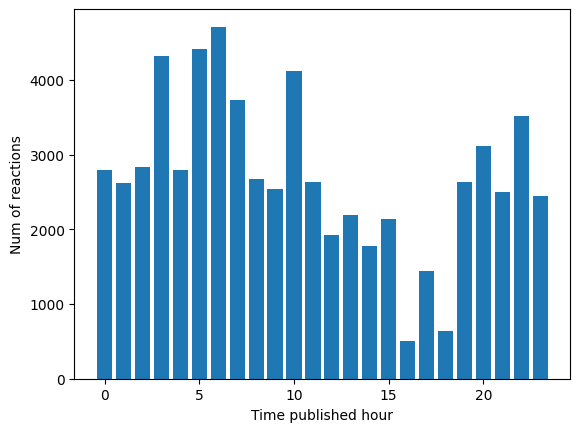

In [97]:
plt.bar(facebook['Time_Published_Hour'], facebook['num_reactions'])
plt.xlabel('Time published hour')
plt.ylabel('Num of reactions')
plt.show()

In [98]:
## The num of rections is more when time of upload is between 3AM to 7AM.

### 2.	Is there a correlation between the number of reactions (num_reactions) and other engagement metrics such as comments (num_comments) and shares (num_shares)? If so, what is the strength and direction of this correlation?

In [99]:
correlation_matrix = facebook[['num_reactions', 'num_comments', 'num_shares']].corr()

In [100]:
correlation_matrix

,num_reactions,num_comments,num_shares
num_reactions,1.000000,0.150843,0.250723
num_comments,0.150843,1.000000,0.640637
num_shares,0.250723,0.640637,1.000000


In [101]:
## The num_reactions is positively correlated with num_comments and num_shares, but not very highlly correlated.
## The num_comments is positively  and highly correlated with num_shares.

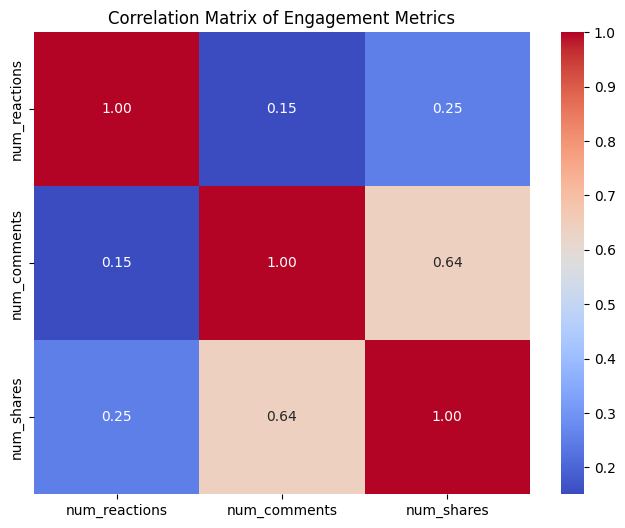

In [102]:
import seaborn as sns
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Engagement Metrics')
plt.show()

### 3.	Use the columns status_type, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, and num_angrys to train a K-Means clustering model on the Facebook Live Sellers dataset.

In [103]:
facebook.head(2)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Date_Published,Time_Published,Time_Published_Hour
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,4/22/2018,6:00,6
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,4/21/2018,22:45,22


In [104]:
columns = ['num_reactions', 'num_comments', 'num_shares',
           'num_likes', 'num_loves', 'num_wows',
           'num_hahas', 'num_sads', 'num_angrys']

In [105]:
fb= facebook[columns]

In [106]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(fb)

#### Finding  optimal number of clusters using elbow method

In [107]:
wcss= []

In [108]:
k_range = range(1, 11)  # Test from k=1 to k=10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

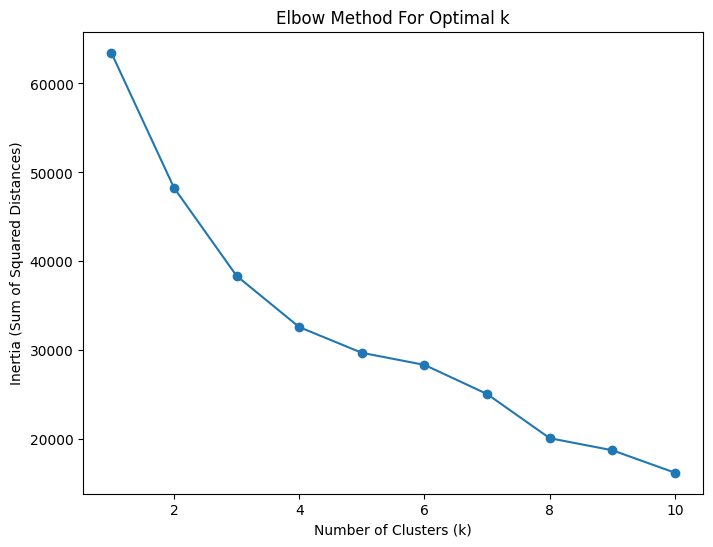

In [109]:
plt.figure(figsize=(8, 6))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()

In [110]:
## K=5 is the elbow point.

### Training the model on  the data set

In [111]:
# Fit KMeans with the optimal k
kmeans = KMeans(n_clusters=5, random_state=42)
fb['Cluster'] = kmeans.fit_predict(scaled_data)

<ipython-input-111-a97f88976912>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fb['Cluster'] = kmeans.fit_predict(scaled_data)


## Visualize the clusters

In [112]:
# We can reduce the dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

In [113]:
# Create a DataFrame with PCA results
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = fb['Cluster']

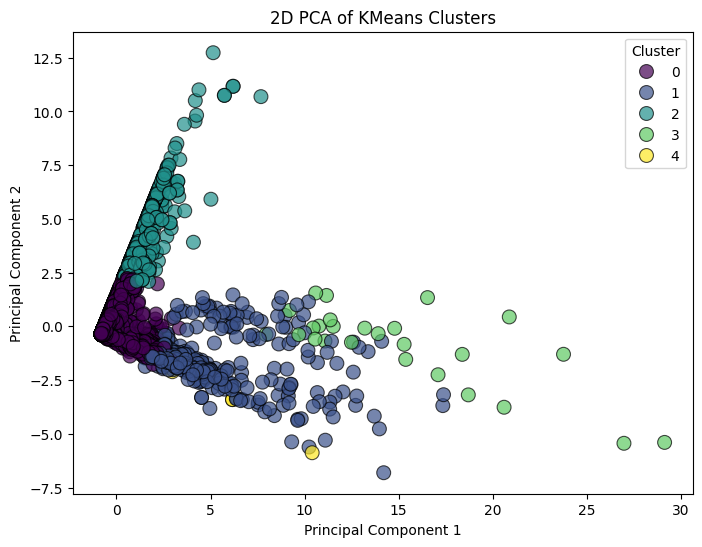

In [114]:
# Plot the clusters in 2D space
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100, marker='o', edgecolor='k', alpha=0.7)
plt.title('2D PCA of KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

## 4.	Use the elbow method to find the optimum number of clusters.

In [115]:
# Already done before

## 5.	What is the count of different types of posts in the dataset?

In [116]:
facebook.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Date_Published,Time_Published,Time_Published_Hour
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,4/22/2018,6:00,6
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,4/21/2018,22:45,22
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,4/21/2018,6:17,6
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,4/21/2018,2:29,2
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,4/18/2018,3:22,3


In [119]:
## Count of different types of posts
facebook['status_type'].value_counts()

,count
status_type,
photo,4288
video,2334
status,365
link,63


## 6.	What is the average value of num_reaction, num_comments, num_shares for each post type?

In [120]:
facebook.head(2)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Date_Published,Time_Published,Time_Published_Hour
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,4/22/2018,6:00,6
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,4/21/2018,22:45,22


In [125]:
avg_values = facebook.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean()

In [127]:
print(avg_values)

             num_reactions  num_comments  num_shares
status_type                                         
link            370.142857      5.698413    4.396825
photo           181.290345     15.993470    2.553871
status          438.783562     36.238356    2.558904
video           283.409597    642.478149  115.679949
